# Objective:
To increase parts sale by devising package for Mechanic which should be in 5000 range and it should be feasible in that way it consumes quickly in market, further target those parts too that are less consumable in network.

In [ ]:
%%capture
!pip install wordcloud

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from functools import reduce

In [ ]:
df_1 = pd.read_excel('Sheet1.xlsx')
df_2 = pd.read_excel('Sheet2.xlsx')
df2 = pd.read_excel('sims.xlsx')
df_s2 = pd.concat([[df_1,df_2]])
grouped_df = df_s2.groupby('ID')
df_2nd = grouped_df.apply(lambda x: x['desc'].unique())
word = pd.merge(df_s2,df_2nd,on='ID')

In [7]:
df = pd.read_excel('word.xlsx')

In [8]:
df.head()

,Unnamed: 0,ID,VISIT_TYPE,desc
0,0,9122621,Periodic Inspection (PI),['Engineoil']
1,1,9037561,Periodic Inspection (PI),['Engineoil']
2,2,10410313,Periodic Inspection (PI),['Engineoil']
3,3,9278399,General Repair (GR),['Clutchlever']
4,4,9291737,General Repair (GR),['Battery']


#### Q1- Identify those parts that are highly consumable in market?

In [23]:
len(df)

657905

(-0.5, 2999.5, 1999.5, -0.5)

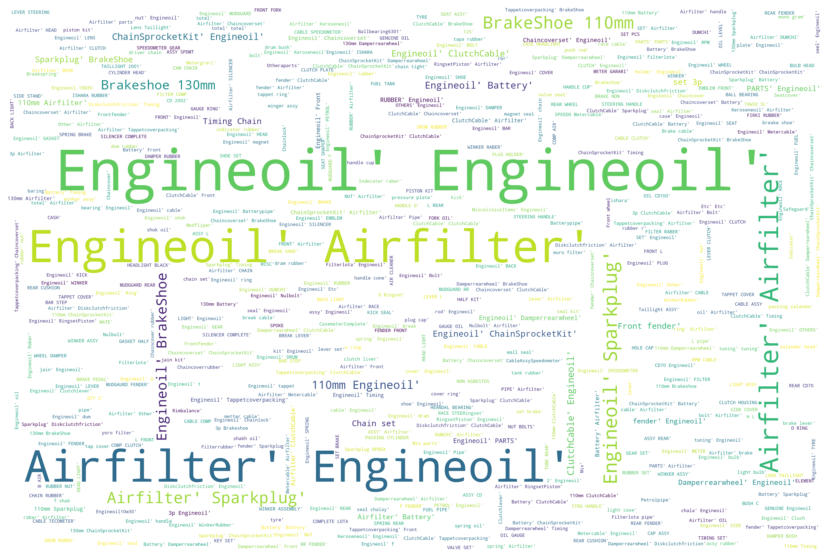

In [9]:
word = df['desc'].apply(str)
positive_df = reduce(lambda a, b: a+b, word)
wc = WordCloud(background_color="white",           # select background color
               width=3000,                         # set wight
               height=2000,                        # set height
               max_words=500).generate(positive_df)
plt.figure(figsize=[15,10])                        # set the figsize
plt.imshow(wc, interpolation="bilinear")           # plot the wordcloud
plt.axis("off") 

In [10]:
df["desc"] = df['desc'].str.lower().str.replace('[^\w\s]','')
new_df = df.desc.str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Word', 'Frequency'] 
new_df.head()

,Word,Frequency
0,engineoil,587445
1,airfilter,248123
2,sparkplug,32466
3,brakeshoe110mm,12275
4,battery,8484


[Text(0, 0, 'engineoil'),
 Text(1, 0, 'airfilter'),
 Text(2, 0, 'sparkplug'),
 Text(3, 0, 'brakeshoe110mm'),
 Text(4, 0, 'battery'),
 Text(5, 0, 'chainsprocketkit'),
 Text(6, 0, 'clutchcable'),
 Text(7, 0, 'brakeshoe130mm'),
 Text(8, 0, 'damperrearwheel'),
 Text(9, 0, 'front')]

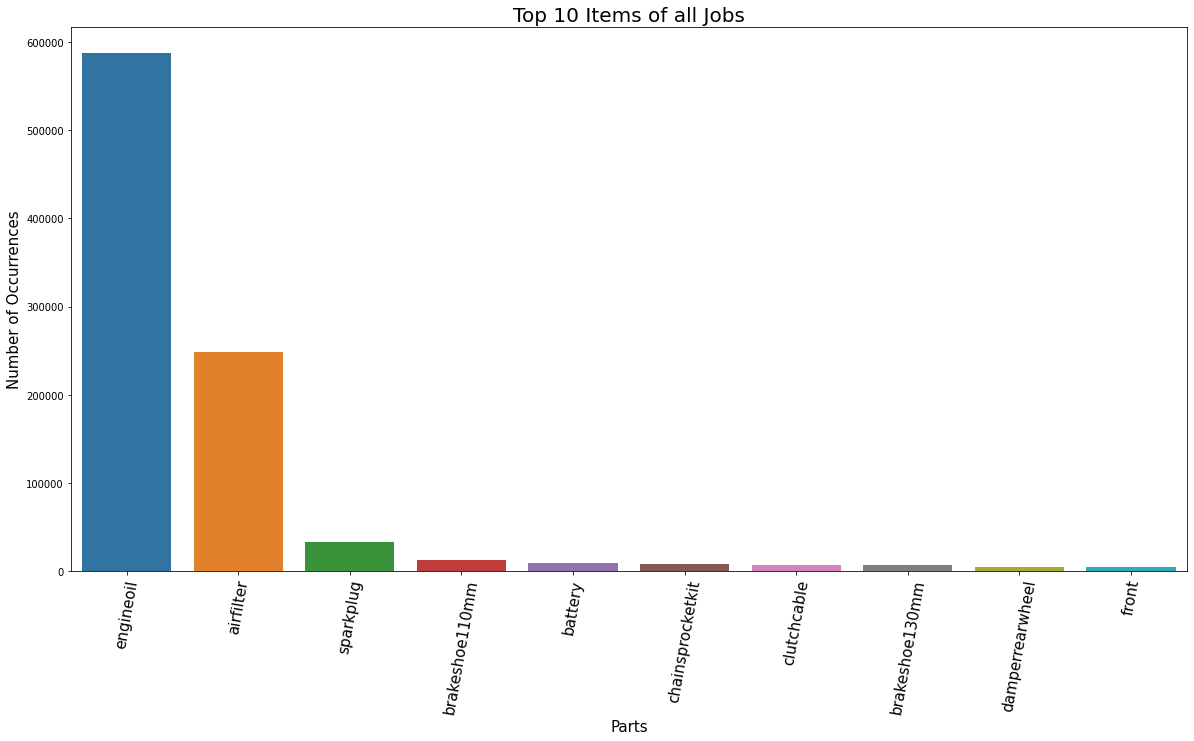

In [11]:
graph = new_df.head(10)
import seaborn as sns
plt.figure(figsize=(20,10))
d = sns.barplot(data = graph, x = 'Word', y = 'Frequency')
plt.title('Top 10 Items of all Jobs',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Parts', fontsize=15)
d.set_xticklabels(d.get_xticklabels(),fontsize = 15,rotation=80)

In [12]:
pi = df[df['VISIT_TYPE'] == 'Periodic Inspection (PI)']
gr = df[df['VISIT_TYPE'] == 'General Repair (GR)']

In [13]:
pi_df = pi.desc.str.split(expand=True).stack().value_counts().reset_index()
pi_df.columns = ['Word', 'Frequency'] 
gr_df = gr.desc.str.split(expand=True).stack().value_counts().reset_index()
gr_df.columns = ['Word', 'Frequency']

In [19]:
pi_df.head(7)

,Word,Frequency
0,engineoil,232309
1,airfilter,95732
2,sparkplug,15364
3,brakeshoe110mm,6457
4,battery,5470
5,chainsprocketkit,5287
6,clutchcable,3956


In [16]:
gr_df.head(7)

,Word,Frequency
0,engineoil,74784
1,airfilter,35764
2,sparkplug,10034
3,brakeshoe110mm,3681
4,brakeshoe130mm,2555
5,chainsprocketkit,2201
6,clutchcable,1939


In [27]:
print("GR Jobs Percentage:",len(gr)/len(df))
print("PI Jobs Percentage:",len(pi)/len(df))
print("Total Jobs Percentage:",len(df))

GR Jobs Percentage: 0.13694682362955138
PI Jobs Percentage: 0.40011399822162774
Total Jobs Percentage: 657905


# Conclusion

As it can be seen that the most highest selling part are Engine oil, Air Filter, Spark plug so these parts are essential for package further the brake shoe would be the most suitable part to be in package because the brake shoe is recently launched with non-asbestos technology so in order to penetrate the product it is wise to sell with high consumable parts. In conclusion 4 parts to be in Small Mechanic parts package

1) Engine Oil (CD-70): 375Rs Qty:3
   Engine Oil (CG-70): 520Rs Qty:3
2) Air Filter: 90Rs Qty:2
3) Spark Plug: 300Rs Qty:1
4) Brake Shoe: 610Rs Qty:3

Total Price is 4995Rs this price is most suitable because according to local survey normal road side mechanic can buy package within Rs:5000 